In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [191]:
#read data
sales = pd.read_csv("./retail_sales_dataset.csv")
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [192]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [193]:
sales.shape

(1000, 9)

In [6]:
sales.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [11]:
#EDA data
sales.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [194]:
sales.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [195]:
#convert date => datetime
sales['Date'] = pd.to_datetime(sales['Date'])

In [196]:
#year column
sales['Year'] = sales['Date'].dt.year
#month column
sales['Month'] = sales['Date'].dt.month
#day column
sales['Day'] = sales['Date'].dt.day

In [197]:
#visualize data
numeric_col = sales.select_dtypes(include = ['int','float'])
numeric_col

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Year,Month,Day
0,1,34,3,50,150,2023,11,24
1,2,26,2,500,1000,2023,2,27
2,3,50,1,30,30,2023,1,13
3,4,37,1,500,500,2023,5,21
4,5,30,2,50,100,2023,5,6
...,...,...,...,...,...,...,...,...
995,996,62,1,50,50,2023,5,16
996,997,52,3,30,90,2023,11,17
997,998,23,4,25,100,2023,10,29
998,999,36,3,50,150,2023,12,5


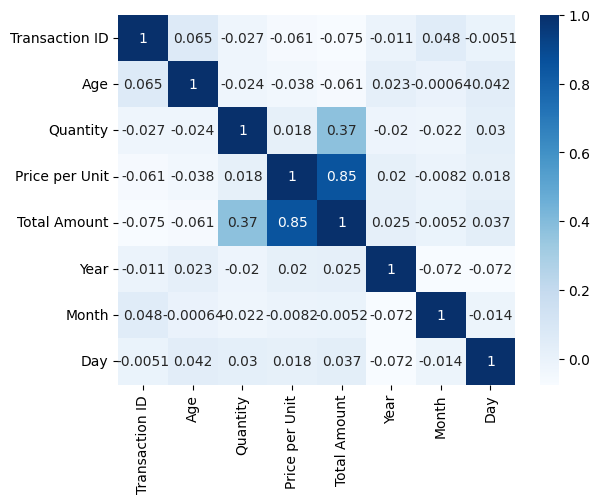

In [70]:
sns.heatmap(numeric_col.corr(),cmap='Blues',annot=True);

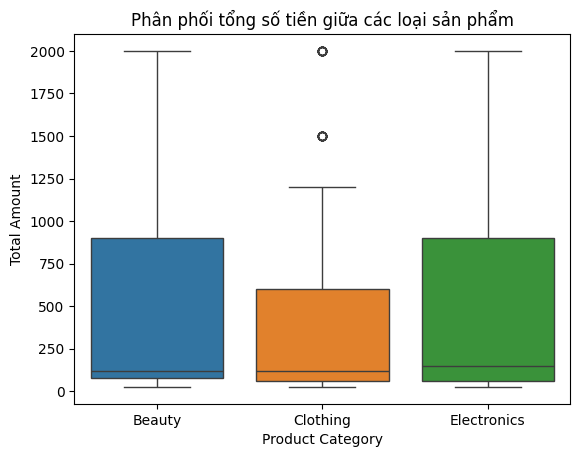

In [24]:
sns.boxplot(data=sales, x='Product Category', y='Total Amount', hue = 'Product Category');
plt.title('Phân phối tổng số tiền giữa các loại sản phẩm');

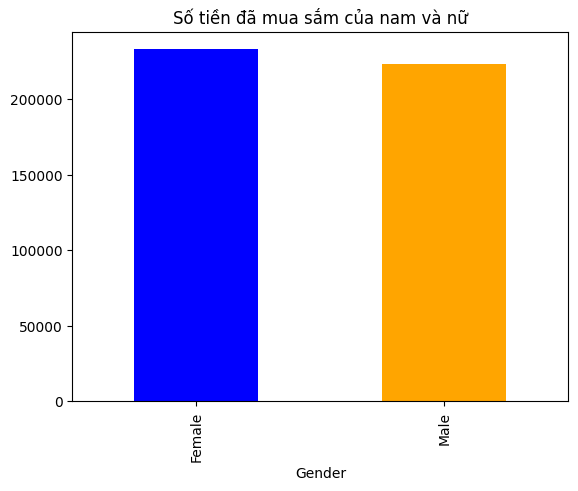

In [34]:
group_amount = sales.groupby(['Gender'])['Total Amount'].sum()
group_amount.plot(kind = 'bar',color = ['blue','orange'])
plt.title('Số tiền đã mua sắm của nam và nữ');

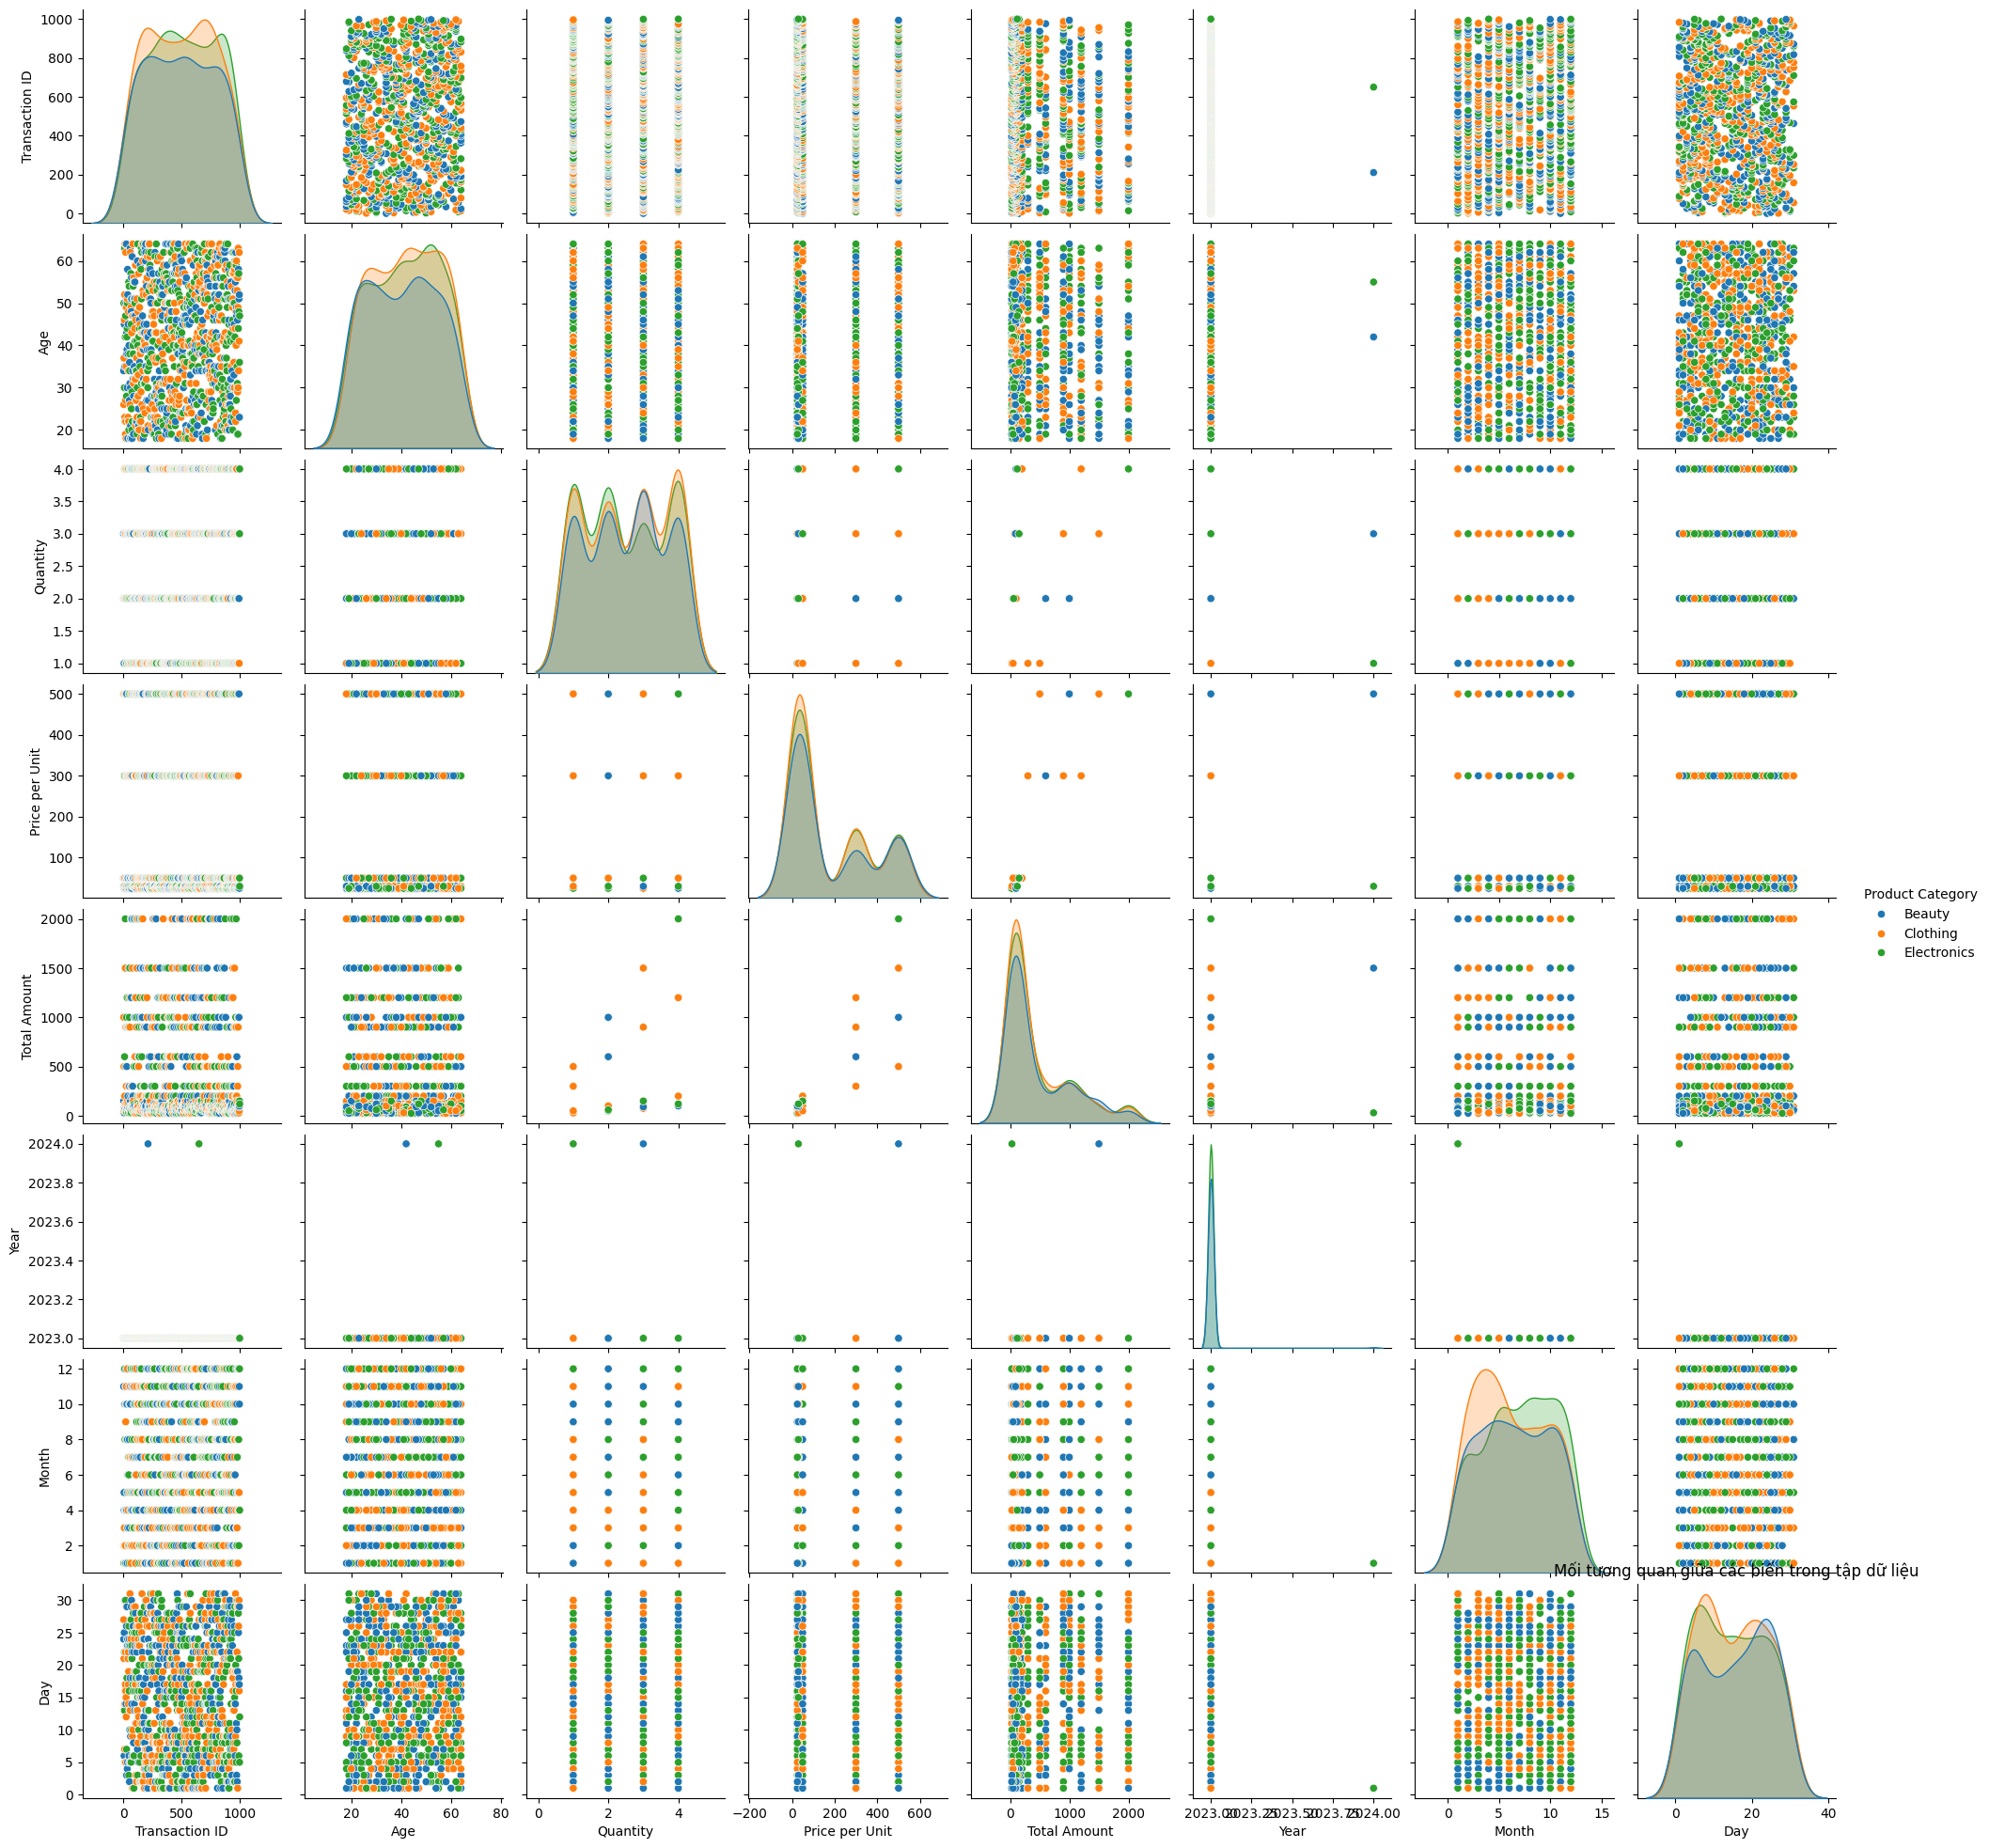

In [198]:
sns.pairplot(sales, hue = 'Product Category')
plt.title('Mối tương quan giữa các biến trong tập dữ liệu');

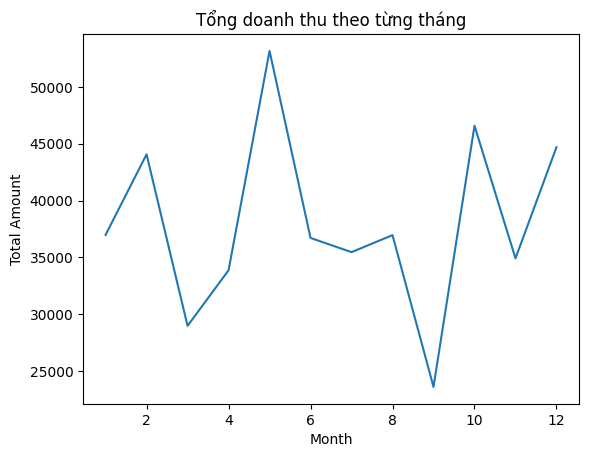

In [199]:
month_sales = sales.groupby(['Month'], as_index=False)['Total Amount'].sum()
sns.lineplot(data = month_sales,x='Month', y = 'Total Amount');
plt.title('Tổng doanh thu theo từng tháng');

### Data preprocessing

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sales['Day of week'] = sales['Date'].dt.dayofweek

# encoding 
sales['Gender'] = sales['Gender'].str.strip()
sales['Product Category'] = sales['Product Category'].str.strip()
sales['Gender'] = sales['Gender'].map({'Male':1,'Female':0})
sales['Product Category'] = sales['Product Category'].map({'Beauty':0,'Clothing':1,'Electronics':2})


In [201]:
scaler = StandardScaler()
scaler_sales = scaler.fit_transform(sales[['Gender','Product Category','Age']])

In [202]:
sales.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Year                0
Month               0
Day                 0
Day of week         0
dtype: int64

### Tìm số cụm theo phương pháp Elbow và Silhouette

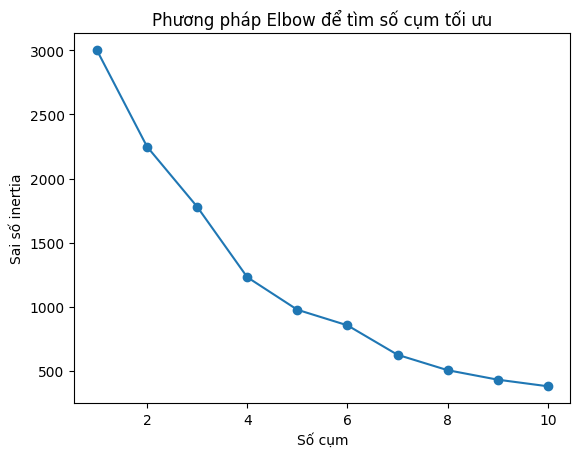

In [203]:
#Chọn k
inertia = [] # sai số giữa điểm dl và tâm cụm
for n in range(1,11):
    kmeans = KMeans(n_clusters=n, random_state= 42)
    kmeans.fit(scaler_sales)
    inertia.append(kmeans.inertia_)

#Vẽ inertia theo số cụm
plt.plot(range(1,11), inertia, marker = 'o')
plt.title('Phương pháp Elbow để tìm số cụm tối ưu')
plt.xlabel('Số cụm')
plt.ylabel('Sai số inertia');

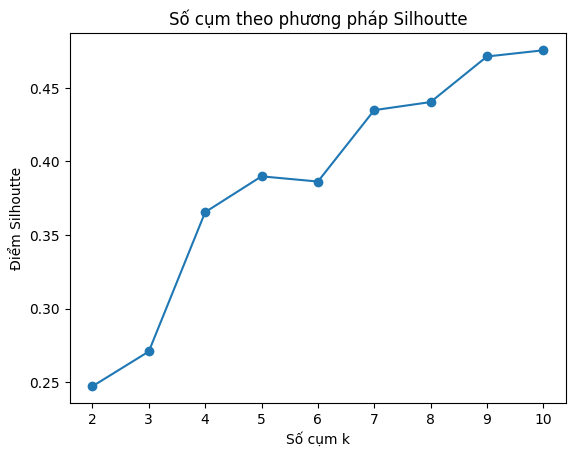

In [204]:
#phương pháp Silhouette Score
from sklearn.metrics import silhouette_score

sil_score = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaler_sales)
    sil_score.append(silhouette_score(scaler_sales,kmeans.labels_))


plt.plot(range(2,11),sil_score, marker = 'o')
plt.title('Số cụm theo phương pháp Silhoutte')
plt.xlabel('Số cụm k')
plt.ylabel('Điểm Silhoutte');

### Clustering với k = 4

In [205]:
kmeans = KMeans(n_clusters=4, random_state= 42)
kmeans.fit(scaler_sales)
sales['Cluster'] = kmeans.labels_

In [206]:
sales

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day,Day of week,Cluster
0,1,2023-11-24,CUST001,1,34,0,3,50,150,2023,11,24,4,0
1,2,2023-02-27,CUST002,0,26,1,2,500,1000,2023,2,27,0,3
2,3,2023-01-13,CUST003,1,50,2,1,30,30,2023,1,13,4,1
3,4,2023-05-21,CUST004,1,37,1,1,500,500,2023,5,21,6,0
4,5,2023-05-06,CUST005,1,30,0,2,50,100,2023,5,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,1,62,1,1,50,50,2023,5,16,1,1
996,997,2023-11-17,CUST997,1,52,0,3,30,90,2023,11,17,4,1
997,998,2023-10-29,CUST998,0,23,0,4,25,100,2023,10,29,6,2
998,999,2023-12-05,CUST999,0,36,2,3,50,150,2023,12,5,1,3


In [207]:
scaler_sales[:5]

array([[ 1.02020406, -1.28596236, -0.54056476],
       [-0.98019606, -0.04348665, -1.12559156],
       [ 1.02020406,  1.19898906,  0.62948884],
       [ 1.02020406, -0.04348665, -0.32117971],
       [ 1.02020406, -1.28596236, -0.83307816]])

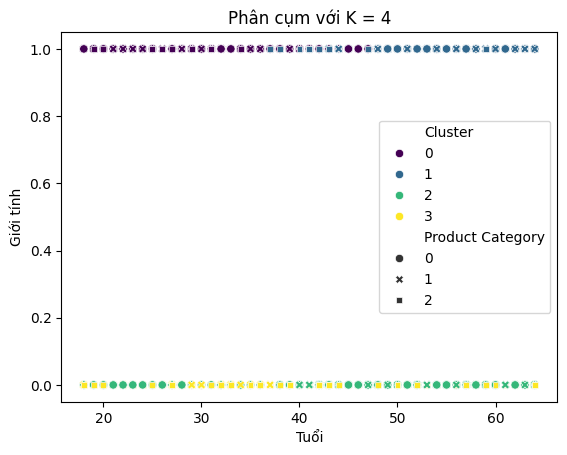

In [208]:
sns.scatterplot(
    x='Age', 
    y= 'Gender', 
    hue='Cluster', 
    style='Product Category', 
    data=sales, 
    palette='viridis'
)
plt.title('Phân cụm với K = 4')
plt.xlabel('Tuổi')
plt.ylabel('Giới tính')
plt.show()


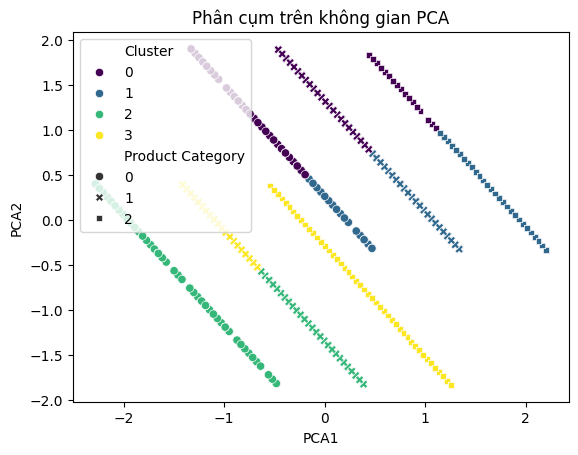

In [209]:
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu xuống 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaler_sales)

# Chuyển kết quả PCA thành DataFrame để trực quan hóa
sales['PCA1'] = pca_data[:, 0]
sales['PCA2'] = pca_data[:, 1]

# Vẽ scatter plot dựa trên kết quả PCA
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    style='Product Category',
    data=sales,
    palette='viridis'
)
plt.title('Phân cụm trên không gian PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


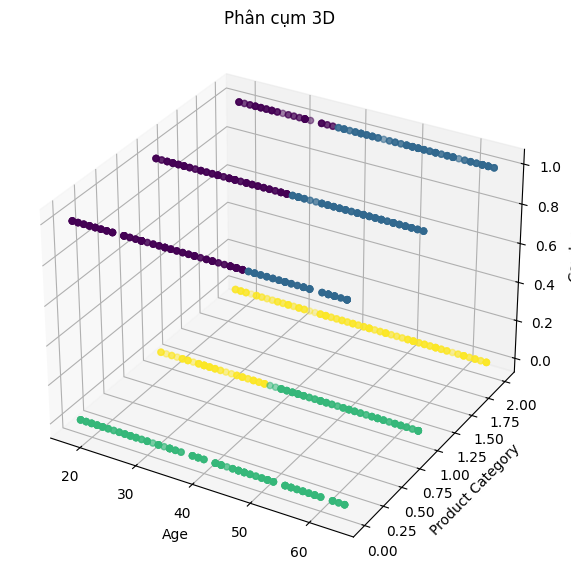

In [210]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    sales['Age'], 
    sales['Product Category'], 
    sales['Gender'], 
    c=sales['Cluster'], 
    cmap='viridis'
)
ax.set_xlabel('Age')
ax.set_ylabel('Product Category')
ax.set_zlabel('Gender')
plt.title('Phân cụm 3D')
plt.show()


In [212]:
sales[sales['Cluster'] == 2]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day,Day of week,Cluster,PCA1,PCA2
5,6,2023-04-25,CUST006,0,45,0,1,30,30,2023,4,25,1,2,-1.223017,-0.902298
9,10,2023-10-07,CUST010,0,52,1,4,50,200,2023,10,7,5,2,-0.081632,-1.248093
18,19,2023-09-16,CUST019,0,62,1,2,25,50,2023,9,16,5,2,0.309583,-1.730534
20,21,2023-01-14,CUST021,0,50,0,1,500,500,2023,1,14,5,2,-1.027409,-1.143518
23,24,2023-11-29,CUST024,0,49,1,1,300,300,2023,11,29,2,2,-0.198997,-1.103361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,2023-05-28,CUST988,0,63,1,3,25,75,2023,5,28,6,2,0.348705,-1.778778
989,990,2023-05-25,CUST990,0,58,0,2,500,1000,2023,5,25,3,2,-0.714437,-1.529470
993,994,2023-12-18,CUST994,0,51,0,2,500,1000,2023,12,18,0,2,-0.988287,-1.191762
994,995,2023-04-30,CUST995,0,41,1,1,30,30,2023,4,30,6,2,-0.511969,-0.717408
